In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#Create path 
path= '/Users/shantamaraj/Desktop/Basketball Analytics/Processed Data'

In [3]:
# Import Data
df= pd.read_csv(os.path.join(path, 'nba_3pt_data.csv'))

df.head()

,season_start,season_end,player,team,games_played,minutes_played,3PM,3PA,3P%,assists,turnovers,total_points,country,team_fullname,state
0,2012,2013,Kevin Durant,OKC,81,3119,139,334,0.416,374,280,2280,United States of America,Oklahoma City Thunder,Oklahoma
1,2012,2013,Kobe Bryant,LAL,78,3013,132,407,0.324,469,287,2133,United States of America,Los Angeles Lakers,California
2,2012,2013,LeBron James,MIA,76,2877,103,254,0.406,551,226,2036,United States of America,Miami Heat,Florida
3,2012,2013,James Harden,HOU,78,2985,179,486,0.368,455,295,2023,United States of America,Houston Rockets,Texas
4,2012,2013,Carmelo Anthony,NYK,67,2482,157,414,0.379,171,175,1920,United States of America,New York Knicks,New York


In [4]:
df.shape

(8046, 15)

### Qestion from Task 1
How have three-point attempts, makes and accuracy evolved across seasons since 2012?
### Goal
Analyze and visualize how 3-point attempts (3PA), 3-point makes (3PM), and 3-point accuracy (3P%) have changed from 2012–2024

In [6]:
# Aggregate average 3-point stats by season
season_trends = df.groupby('season_start').agg({'3PA': 'mean', '3PM': 'mean', '3P%': 'mean'}).reset_index()

season_trends.head()

,season_start,3PA,3PM,3P%
0,2012,77.649926,27.781388,0.227316
1,2013,83.141606,29.897810,0.237380
2,2014,84.680000,29.605714,0.243507
3,2015,92.146165,32.596237,0.263433
4,2016,101.309558,36.245364,0.276214


In [7]:
season_trends.tail()

,season_start,3PA,3PM,3P%
7,2019,104.931635,37.576408,0.296316
8,2020,103.534018,37.931964,0.284765
9,2021,112.593674,39.821168,0.280109
10,2022,156.150278,56.324675,0.315306
11,2023,25.588785,8.981308,0.260131


<Figure size 1000x600 with 0 Axes>

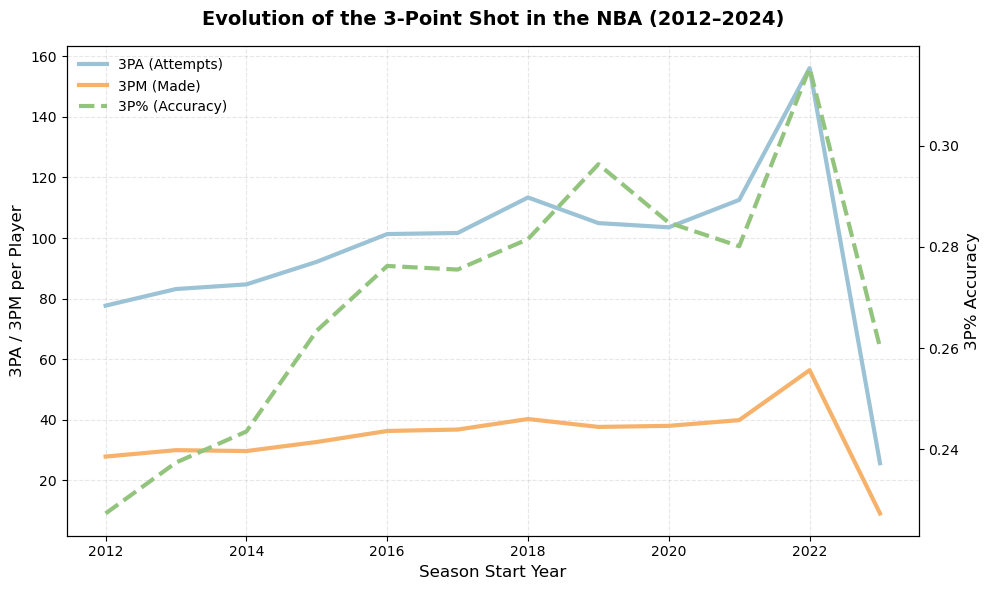

In [15]:
#Linechart of Evolution of the 3-Point Shot in the NBA from 2012–2024

plt.figure(figsize=(10,6))

# Define pastel colors
pastel_blue = '#9CC3D5'     # 3PA
pastel_orange = '#F6B26B'   # 3PM
pastel_green = '#93C47D'    # 3P%

# Create the main axis
fig, ax1 = plt.subplots(figsize=(10,6))

# Plot 3PA and 3PM on the left axis
line1 = ax1.plot(season_trends['season_start'], season_trends['3PA'], color=pastel_blue, linewidth=3, label='3PA (Attempts)')
line2 = ax1.plot(season_trends['season_start'], season_trends['3PM'], color=pastel_orange, linewidth=3, label='3PM (Made)')

# Create a second y-axis for 3P%
ax2 = ax1.twinx()
line3 = ax2.plot(season_trends['season_start'], season_trends['3P%'], color=pastel_green, linestyle='--', linewidth=3, label='3P% (Accuracy)')

# Combine legends from both axes
lines = line1 + line2 + line3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', frameon=False)

# Titles and axis labels
ax1.set_title('Evolution of the 3-Point Shot in the NBA (2012–2024)', fontsize=14, weight='bold', pad=15)
ax1.set_xlabel('Season Start Year', fontsize=12)
ax1.set_ylabel('3PA / 3PM per Player', fontsize=12)
ax2.set_ylabel('3P% Accuracy', fontsize=12)

# Grid and layout
ax1.grid(alpha=0.3, linestyle='--')
plt.tight_layout()

plt.show()

### Linechart- Evolution of the 3-Point Shot in the NBA (2012–2024)

This visualization tracks the league-wide trends in 3-point attempts (3PA), makes (3PM), and shooting accuracy (3P%) from 2012 to 2024.  
The analysis reveals a dramatic long-term rise in both attempts and makes, showing how the NBA has evolved into a perimeter-oriented league.  
The steep increase between 2015 and 2022 aligns with the “three-point revolution,” driven by analytics-based strategies that prioritize spacing, efficiency, and high-value shots from deep range.

The recent decline after 2022 may reflect a combination of factors:  
- **Smaller or incomplete sample sizes** for recent seasons in the dataset.  
- **Increased defensive pressure** on perimeter shooters as teams adapt.  
- **Injury and rotation changes**, which often affect shooting consistency across the league.  

Despite this short-term dip, the overall pattern demonstrates that the 3-point shot has permanently reshaped the modern game.  
Players and teams continue to rely heavily on long-range scoring, even as accuracy stabilizes around consistent league averages.

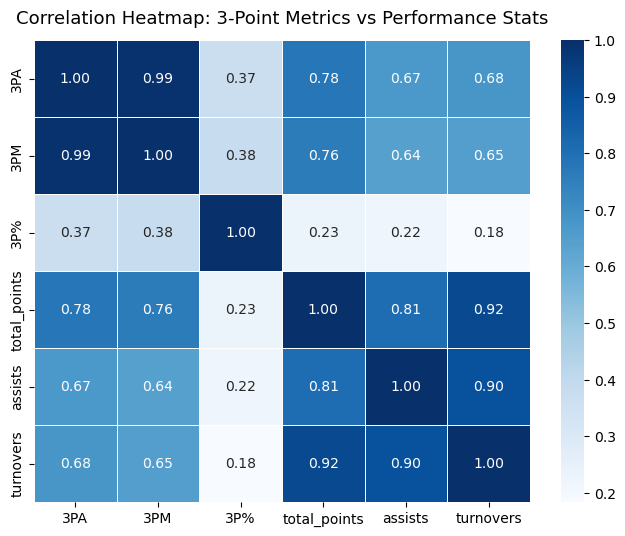

In [16]:
#Heatmap of 3-Point Metrics vs Performance Stats

heatmap_cols = ['3PA', '3PM', '3P%', 'total_points', 'assists', 'turnovers']

# Compute correlation matrix
corr = df[heatmap_cols].corr()

#Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: 3-Point Metrics vs Performance Stats', fontsize=13, pad=12)
plt.show()

### Correlation Heatmap: 3-Point Metrics vs Performance Stats

The heatmap illustrates the relationships between 3-point performance metrics (3PA, 3PM, 3P%) and overall player performance indicators (total points, assists, and turnovers).  

The results show:
- A **very strong positive correlation** between **3-point attempts (3PA)** and **3-point makes (3PM)** (0.99), which confirms that higher shooting volume naturally leads to more successful shots.  
- Both 3PA and 3PM show **moderate-to-strong positive relationships** with **total points (0.78 and 0.76)**, suggesting that players who shoot more from beyond the arc contribute significantly to overall scoring output.  
- A **moderate correlation** between **3PA and assists (0.67)** indicates that high-volume 3-point teams often rely on good ball movement to create open looks.  
- **Turnovers** also correlate positively (around 0.65–0.68), which could suggest that higher offensive tempo and passing volume increase risk-taking but also create more 3-point opportunities.  
- **3-point accuracy (3P%)** shows weaker correlations across most variables, meaning that efficiency varies independently of volume — not every high-volume shooter maintains elite accuracy.  

Overall, this correlation analysis supports the idea that the 3-point shot is deeply connected to a team’s scoring and playmaking structure.  
It justifies focusing the subsequent analysis on how 3-point shooting trends have evolved over time and influenced overall offensive performance in the NBA

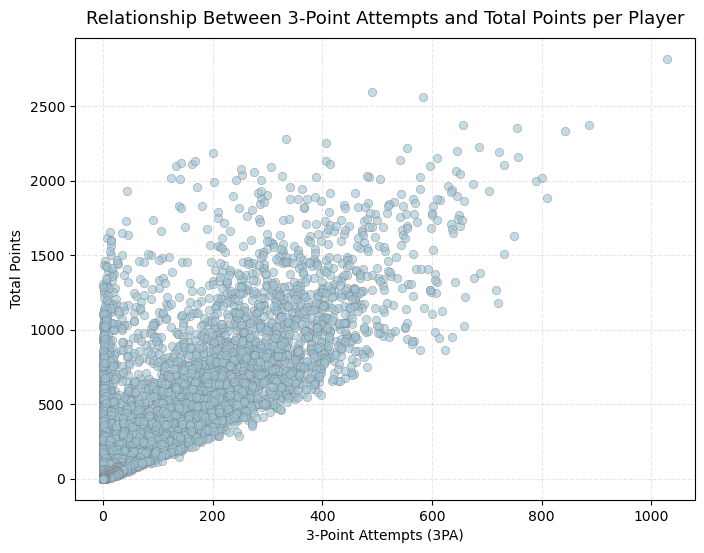

In [20]:
#Scatterplot: Relationship Between 3-Point Attempts and Total Points per Player

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='3PA',
    y='total_points',
    color='#9CC3D5',     # soft pastel blue
    alpha=0.6,
    edgecolor='gray')

plt.title('Relationship Between 3-Point Attempts and Total Points per Player', fontsize=13, pad=10)
plt.xlabel('3-Point Attempts (3PA)')
plt.ylabel('Total Points')
plt.grid(alpha=0.3, linestyle='--')
plt.show()

### Scatterplot: Relationship Between 3-Point Attempts and Total Points

This scatterplot illustrates how total points varies with the number of 3-point attempts per player.  
The upward trend confirms a **strong positive relationship**, meaning players who shoot more from beyond the arc generally score more total points.  

While the pattern isn’t perfectly linear (since some high scorers also rely on free throws or inside scoring) the dense upward spread highlights how integral 3-point volume has become to overall offensive production.  

The cluster near the lower-left corner represents lower-usage players (e.g., bench or defensive specialists), while the wider upper area reflects high-volume shooters who drive their team’s scoring load.  
This visualization supports the conclusion that **increased 3-point volume directly contributes to higher overall scoring**, reinforcing why the 3-point shot is central to modern NBA offense.

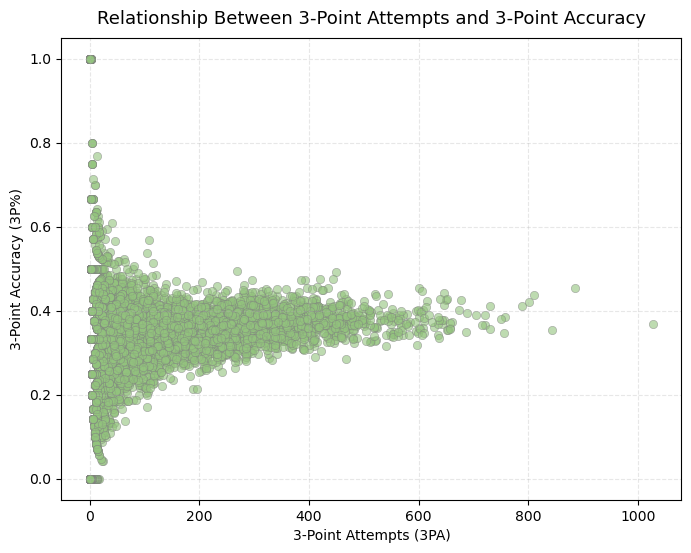

In [21]:
#Scatterplot: Relationship Between 3-Point Attempts and  3-Point Accuracy

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='3PA',
    y='3P%',
    color='#93C47D',   # pastel green
    alpha=0.6,
    edgecolor='gray'
)

plt.title('Relationship Between 3-Point Attempts and 3-Point Accuracy', fontsize=13, pad=10)
plt.xlabel('3-Point Attempts (3PA)')
plt.ylabel('3-Point Accuracy (3P%)')
plt.grid(alpha=0.3, linestyle='--')
plt.show()

### Scatterplot: Relationship Between 3-Point Attempts and 3-Point Accuracy

This scatterplot examines the relationship between the number of 3-point attempts (3PA) and shooting accuracy (3P%) per player.  
The data shows **no strong linear relationship**, meaning that players who attempt more 3-pointers do not necessarily achieve higher accuracy.  

Most players cluster between **0.30–0.40 accuracy**, regardless of volume, indicating that while the overall 3-point rate has increased, efficiency remains relatively stable.  
A few outliers appear at both extremes:  
- Some **high-efficiency, low-volume shooters** (specialists who take fewer but well-selected shots).  
- A smaller group of **high-volume shooters** who maintain accuracy despite tougher defensive attention.  

This pattern reflects the strategic trade-off in modern basketball as teams encourage more 3-point shots to increase scoring potential, maintaining elite efficiency becomes more challenging.  
It reinforces that the **3-point revolution** is driven by volume and opportunity rather than universal improvements in shooting accuracy.

/var/folders/9x/769d711n421bxzq6p4jzg37m0000gn/T/ipykernel_10290/1492722435.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


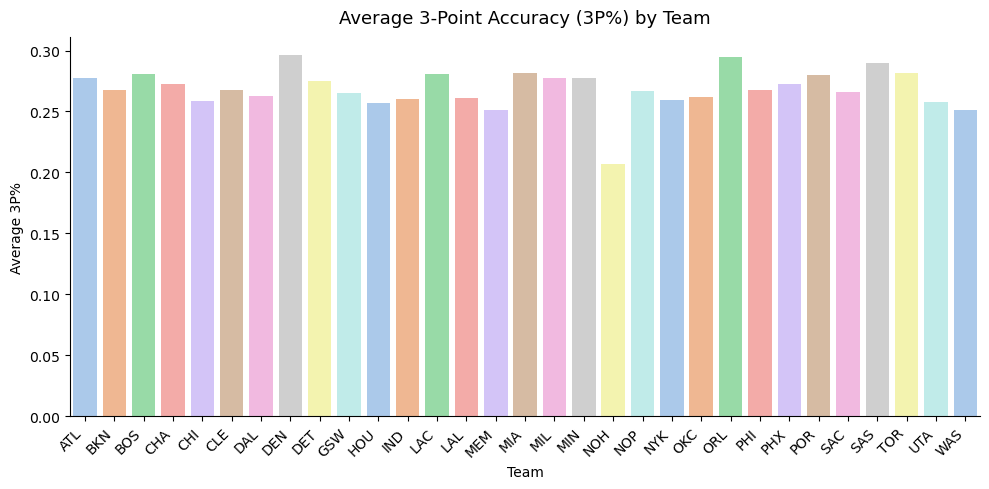

In [24]:
#Categorical Plot: Average 3-Point Accuracy by Team

# Calculate average 3P% by state
avg_state_3p = df.groupby('team')['3P%'].mean().reset_index()

# Create categorical plot
sns.catplot(
    data=avg_state_3p,
    x='team',
    y='3P%',
    kind='bar',
    height=5,
    aspect=2,
    palette='pastel')

plt.title('Average 3-Point Accuracy (3P%) by Team', fontsize=13, pad=10)
plt.xlabel('Team')
plt.ylabel('Average 3P%')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Categorical Plot: Average 3-Point Accuracy by Team

This categorical plot displays the average 3-point shooting accuracy (3P%) for each NBA team between 2012 and 2024.  
The visualization highlights how team-level shooting efficiency varies slightly across the league, though overall accuracy remains clustered between 25% and 30%.  

Teams such as **Denver (DEN)**, **Golden State (GSW)**, and **Philadelphia (PHI)** appear among the top performers, reflecting modern offensive systems built around perimeter shooting.  
Meanwhile, teams with slightly lower averages may rely more on inside scoring or have undergone roster transitions affecting their shooting consistency.  

Overall, the chart reinforces a key trend in modern basketball: while nearly every team has increased its 3-point volume, efficiency gains have remained modest, suggesting a league wide plateau in shooting accuracy despite strategic emphasis on the 3-point shot.

/var/folders/9x/769d711n421bxzq6p4jzg37m0000gn/T/ipykernel_10290/4206245781.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


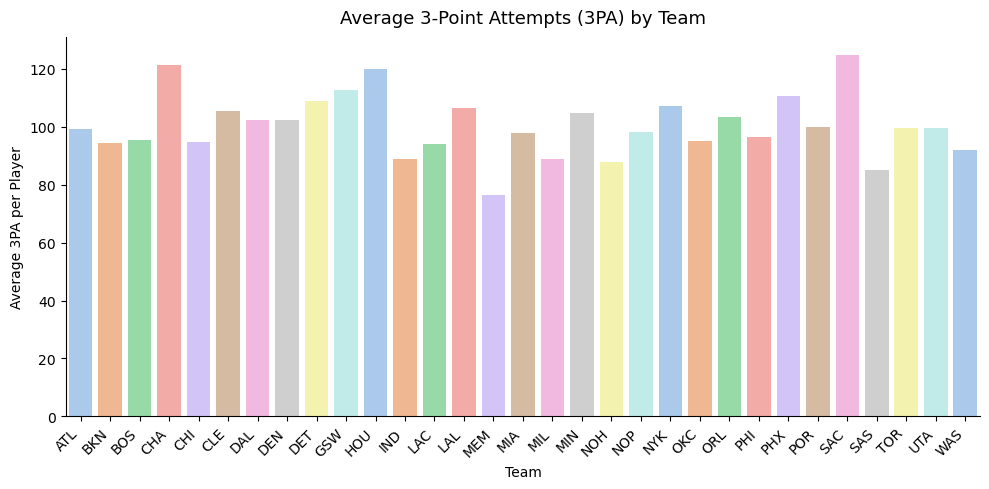

In [25]:
#Categorical Plot: Average 3-Point Attempts (3PA) by Team

# Calculate average 3PA (3-point attempts) by team
avg_team_3pa = df.groupby('team')['3PA'].mean().reset_index()

# Create categorical plot
sns.catplot(
    data=avg_team_3pa,
    x='team',
    y='3PA',
    kind='bar',
    height=5,
    aspect=2,
    palette='pastel')

plt.title('Average 3-Point Attempts (3PA) by Team', fontsize=13, pad=10)
plt.xlabel('Team')
plt.ylabel('Average 3PA per Player')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Categorical Plot: Average 3-Point Attempts (3PA) by Team

This plot illustrates the average number of 3-point attempts per player for each NBA team from 2012–2024.  
While 3-point accuracy tends to remain steady across the league, the volume of attempts shows much greater variation between teams.  

Franchises such as **Houston (HOU)**, **Golden State (GSW)**, and **Sacramento (SAC)** exhibit the highest average attempts, reflecting offensive systems that prioritize pace, spacing, and perimeter shooting.  
In contrast, teams with lower averages, such as **Miami (MIA)** or **San Antonio (SAS)**, likely emphasize balanced scoring or interior play.  

Together with the previous accuracy plot, this visualization reinforces that while shooting efficiency across teams is relatively uniform, the *willingness to shoot threes* is a key factor distinguishing modern offensive strategies in the NBA.